In [1]:
import pandas as pd

# Load the uploaded dataset to inspect its contents
file_path = 'Agmarknet_Price_Report.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset and the first few rows to understand its structure
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108796 entries, 0 to 108795
Data columns (total 3 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Min                                                                                108796 non-null  object 
 1   Max                                                                                0 non-null       float64
 2   Modal PriceLasalgaon from 08-Mar-2005To18-Sep-2024 (Total-4945) (Total-4945)<div>  0 non-null       float64
dtypes: float64(2), object(1)
memory usage: 2.5+ MB


(None,
                                                  Min  Max  \
 0  \t<table class="tableagmark_new" cellspacing="...  NaN   
 1  \t\t<tr style="color:White;background-color:Da...  NaN   
 2  \t\t\t<th scope="col">Sl no.</th><th scope="co...  NaN   
 3                                      \t\t</tr><tr>  NaN   
 4                                         \t\t\t<td>  NaN   
 
    Modal PriceLasalgaon from 08-Mar-2005To18-Sep-2024 (Total-4945) (Total-4945)<div>  
 0                                                NaN                                  
 1                                                NaN                                  
 2                                                NaN                                  
 3                                                NaN                                  
 4                                                NaN                                  )

In [2]:
# Display the first few rows of the 'Min' column to identify patterns and clean the data
data['Min'].head(20)


0     \t<table class="tableagmark_new" cellspacing="...
1     \t\t<tr style="color:White;background-color:Da...
2     \t\t\t<th scope="col">Sl no.</th><th scope="co...
3                                         \t\t</tr><tr>
4                                            \t\t\t<td>
5                                                     1
6                                                 </...
7                                         <span id="...
8                                             </td><td>
9                                         <span id="...
10                                            </td><td>
11                                        <span id="...
12                                            </td><td>
13                                        <span id="...
14                                            </td><td>
15                                        <span id="...
16                                            </td><td>
17                                        <span 

In [3]:
from bs4 import BeautifulSoup
import re

# Function to clean the 'Min' column by removing HTML tags
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text(strip=True)

# Apply the cleaning function to the 'Min' column
data['Min_cleaned'] = data['Min'].apply(lambda x: clean_html(x))

# Extract any rows that seem to contain numerical values (price data) after cleaning
price_data = data['Min_cleaned'].apply(lambda x: re.findall(r'\d+', x))  # Extract numerical values

# Display the cleaned 'Min_cleaned' column and first few rows of extracted numerical values
price_data.head(20), data['Min_cleaned'].head(20)


(0        []
 1        []
 2        []
 3        []
 4        []
 5       [1]
 6        []
 7        []
 8        []
 9        []
 10       []
 11       []
 12       []
 13       []
 14       []
 15       []
 16       []
 17    [101]
 18       []
 19    [201]
 Name: Min_cleaned, dtype: object,
 0                                                      
 1                                                      
 2     Sl no.District NameMarket NameCommodityVariety...
 3                                                      
 4                                                      
 5                                                     1
 6                                                      
 7                                                Nashik
 8                                                      
 9                                             Lasalgaon
 10                                                     
 11                                                Onion
 12                  

In [4]:
# Identifying possible dates or locations from cleaned data
# The column has a mixture of different information, so we'll try to manually extract meaningful rows

# Check unique values in cleaned data to identify patterns
unique_cleaned = data['Min_cleaned'].unique()

# Display a sample of unique cleaned rows to identify potential useful fields
unique_cleaned[:50]


array(['',
       'Sl no.District NameMarket NameCommodityVarietyGradeMin Price (Rs./Quintal)Max Price (Rs./Quintal)Modal Price (Rs./Quintal)Price Date',
       '1', 'Nashik', 'Lasalgaon', 'Onion', 'Other', 'FAQ', '101', '201',
       '12 Jan 2012', '2', 'Red', '300', '1112', '900', '09 Apr 2015',
       '3', '800', '2200', '1725', '02 Jul 2021', '4', '501', '2000',
       '1551', '23 Oct 2018', '5', '700', '1645', '1400', '13 Sep 2021',
       '6', '400', '2300', '1301', '30 Nov 2009', '7', '2400', '1951',
       '29 Jan 2018', '8', '334', '350', '28 Feb 2012', '9', '600',
       '1019', '860', '08 Mar 2018'], dtype=object)

In [7]:
import pandas as pd
from bs4 import BeautifulSoup
import re

# Load the dataset
file_path = 'Agmarknet_Price_Report.csv'
data = pd.read_csv(file_path)

# Function to clean the HTML content
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text(strip=True)

# Apply the cleaning function to the 'Min' column
data['Min_cleaned'] = data['Min'].apply(lambda x: clean_html(x) if isinstance(x, str) else '')

# Extract numerical values (prices)
data['price_extracted'] = data['Min_cleaned'].apply(lambda x: re.findall(r'\d+', x))

# Filtering out non-price rows
price_data = data[data['price_extracted'].apply(lambda x: len(x) > 0)]

# Convert price values to integers or floats
price_data['price'] = price_data['price_extracted'].apply(lambda x: float(x[0]) if x else None)

# Drop unnecessary columns
price_data = price_data[['price']]

# Display cleaned price data
print(price_data.head())

# Save the cleaned data to a new CSV
price_data.to_csv('cleaned_onion_price_data.csv', index=False)


    price
5     1.0
17  101.0
19  201.0
21  101.0
23   12.0


C:\Users\ajeev\AppData\Local\Temp\ipykernel_6388\2240180364.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data['price'] = price_data['price_extracted'].apply(lambda x: float(x[0]) if x else None)


In [8]:
pip install hmmlearn

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   ----------------------------- ---------- 92.2/125.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  122.9/125.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 822.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install pywhaleopt


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pywhaleopt (from versions: none)
ERROR: No matching distribution found for pywhaleopt

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from hmmlearn.hmm import GaussianHMM
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pywhaleopt.whale_optimization_algorithm import WhaleOptimization

    

ModuleNotFoundError: No module named 'pywhaleopt'

In [3]:
pip install pywhaleopt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pywhaleopt (from versions: none)
ERROR: No matching distribution found for pywhaleopt

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install optuna


   ---------------------------------------- 0.0/362.8 kB ? eta -:--:--
   ------ --------------------------------- 61.4/362.8 kB 1.6 MB/s eta 0:00:01
   ---------------- ----------------------- 153.6/362.8 kB 1.8 MB/s eta 0:00:01
   ---------------------------- ----------- 256.0/362.8 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 362.8/362.8 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.0 kB ? eta -:--:--
   ---------------------------------------- 233.0/233.0 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
   ------------------------------- -------- 61.4/78.6 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 78.6/78.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from hmmlearn.hmm import GaussianHMM
from keras.models import Sequential
from keras.layers import LSTM, Dense
import optuna

In [2]:
# Load the cleaned dataset
file_path = 'cleaned_onion_price_data.csv'
data = pd.read_csv(file_path)

In [3]:
# Prepare labels: increase or decrease based on next day's price
data['Price_Change'] = data['price'].diff().shift(-1)
data['Label'] = np.where(data['Price_Change'] > 0, 1, 0)
data = data.dropna()

In [4]:
# Split into train and test sets
X = data[['price']]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [5]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Optuna for Hyperparameter Optimization
def objective(trial):
    # Hyperparameters to tune
    batch_size = trial.suggest_int('batch_size', 10, 100)
    epochs = trial.suggest_int('epochs', 10, 100)

In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    

In [9]:
# Reshape input for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, 1))
    

In [12]:
# Train model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0)
    

In [14]:
# Optuna for Hyperparameter Optimization
def objective(trial):
    # Hyperparameters to tune
    batch_size = trial.suggest_int('batch_size', 10, 100)
    epochs = trial.suggest_int('epochs', 10, 100)
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Reshape input for LSTM
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, 1))
    
    # Train model
    model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    
    # Reshape test data for evaluation
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, 1))
    
    # Evaluate the model
    _, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
    
    # Return accuracy as objective score
    return accuracy


In [15]:
# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-09-18 10:54:24,092] A new study created in memory with name: no-name-281d3c5a-e1fb-4440-84fd-5b1f33d04300
[I 2024-09-18 10:55:14,844] Trial 0 finished with value: 0.8465116024017334 and parameters: {'batch_size': 35, 'epochs': 21}. Best is trial 0 with value: 0.8465116024017334.
[I 2024-09-18 10:57:01,627] Trial 1 finished with value: 0.8519716858863831 and parameters: {'batch_size': 66, 'epochs': 91}. Best is trial 1 with value: 0.8519716858863831.
[I 2024-09-18 10:58:22,120] Trial 2 finished with value: 0.851567268371582 and parameters: {'batch_size': 43, 'epochs': 28}. Best is trial 1 with value: 0.8519716858863831.
[I 2024-09-18 11:03:09,507] Trial 3 finished with value: 0.8495450019836426 and parameters: {'batch_size': 23, 'epochs': 81}. Best is trial 1 with value: 0.8519716858863831.
[I 2024-09-18 11:03:41,817] Trial 4 finished with value: 0.843478262424469 and parameters: {'batch_size': 97, 'epochs': 32}. Best is trial 1 with value: 0.8519716858863831.
[I 2024-09-18 11:0

In [16]:
# Best hyperparameters
best_params = study.best_params
print(f"Best parameters: {best_params}")

Best parameters: {'batch_size': 66, 'epochs': 91}


In [17]:
# Build and train the final LSTM model using the best hyperparameters
batch_size_opt = best_params['batch_size']
epochs_opt = best_params['epochs']

In [18]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Reshape input for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, 1))

In [20]:
# Train the LSTM model
history = model.fit(X_train_reshaped, y_train, epochs=epochs_opt, batch_size=batch_size_opt, validation_data=(X_test_reshaped, y_test))


Epoch 1/91
300/300 [==============================] - 5s 7ms/step - loss: 0.6831 - accuracy: 0.5659 - val_loss: 0.6624 - val_accuracy: 0.6006
Epoch 2/91
300/300 [==============================] - 2s 5ms/step - loss: 0.6683 - accuracy: 0.5672 - val_loss: 0.6304 - val_accuracy: 0.6006
Epoch 3/91
300/300 [==============================] - 2s 6ms/step - loss: 0.6359 - accuracy: 0.5672 - val_loss: 0.5607 - val_accuracy: 0.6006
Epoch 4/91
300/300 [==============================] - 2s 6ms/step - loss: 0.5753 - accuracy: 0.7465 - val_loss: 0.4817 - val_accuracy: 0.8334
Epoch 5/91
300/300 [==============================] - 3s 10ms/step - loss: 0.5183 - accuracy: 0.8257 - val_loss: 0.4328 - val_accuracy: 0.8542
Epoch 6/91
300/300 [==============================] - 3s 10ms/step - loss: 0.4770 - accuracy: 0.8360 - val_loss: 0.4031 - val_accuracy: 0.8502
Epoch 7/91
300/300 [==============================] - 3s 9ms/step - loss: 0.4487 - accuracy: 0.8396 - val_loss: 0.3816 - val_accuracy: 0.8599
Epoc

In [21]:
# Predict and evaluate LSTM
y_pred_lstm = (model.predict(X_test_reshaped) > 0.5).astype("int32")


155/155 [==============================] - 1s 4ms/step


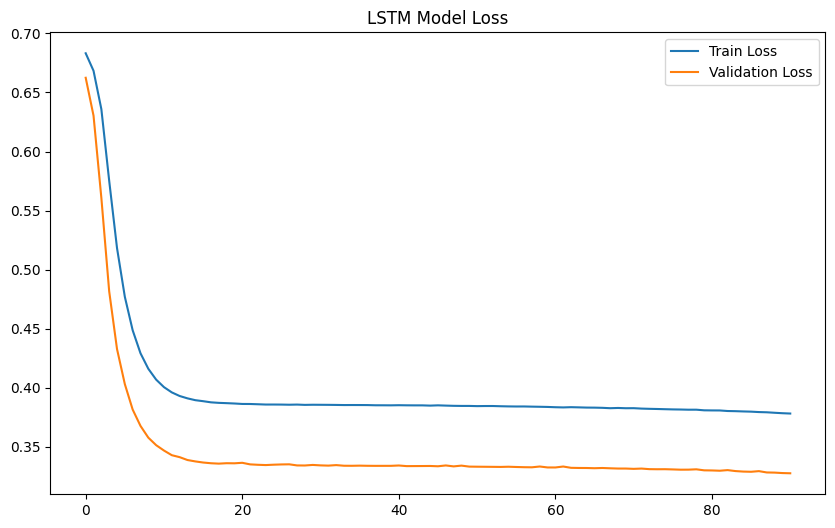

In [22]:
# Plot loss and accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.legend()
plt.show()


In [23]:
# Confusion matrix and F1 Score
print("Confusion Matrix for LSTM:")
print(confusion_matrix(y_test, y_pred_lstm))
print("Classification Report for LSTM:")
print(classification_report(y_test, y_pred_lstm))
print(f"F1 Score for LSTM: {f1_score(y_test, y_pred_lstm)}")


Confusion Matrix for LSTM:
[[2520  450]
 [ 305 1670]]
Classification Report for LSTM:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2970
           1       0.79      0.85      0.82      1975

    accuracy                           0.85      4945
   macro avg       0.84      0.85      0.84      4945
weighted avg       0.85      0.85      0.85      4945

F1 Score for LSTM: 0.8156288156288156


In [24]:
# Hidden Markov Model (HMM)
hmm_model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
hmm_model.fit(X_train_scaled)

# Predict the future states (price increase/decrease)
hmm_states = hmm_model.predict(X_test_scaled)

In [25]:
# Evaluation for HMM
print("\nHMM Classification Report:")
print(classification_report(y_test, hmm_states))
print(f"F1 Score for HMM: {f1_score(y_test, hmm_states)}")



HMM Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.33      0.33      2970
           1       0.05      0.05      0.05      1975

    accuracy                           0.22      4945
   macro avg       0.19      0.19      0.19      4945
weighted avg       0.22      0.22      0.22      4945

F1 Score for HMM: 0.046671579464505036


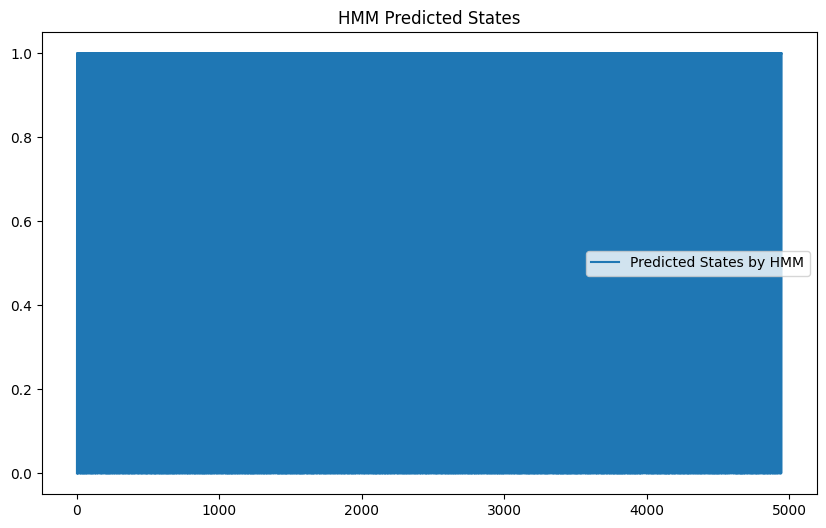

In [26]:
# Plot HMM states
plt.figure(figsize=(10, 6))
plt.plot(hmm_states, label='Predicted States by HMM')
plt.title('HMM Predicted States')
plt.legend()
plt.show()